## Week 9 Assignment(Data Science 2)

<b>Part 1 : Exploring Data Visualization in Python with Matplotlib</b>

Objective: In this assignment, you will learn how to use Matplotlib, a popular data visualization
library in Python. You will practice creating different types of visualizations such as line plots,
scatter plots, histograms, bar charts, and heatmaps using Matplotlib. You will use the "Iris"
dataset from the UCI Machine Learning Repository.

Tasks:

1. Import the necessary libraries: Start by importing the required libraries, including Matplotlib, NumPy, and pandas.

2. Load the dataset: Load the Iris dataset(load_iris) from sklearn.datasets convert it into a pandas DataFrame. The dataset contains 150 rows and 5 columns (4 features and 1 target variable).

3. Line Plot: Create a line plot to visualize the trend in the data over time. Since this is not a time-series dataset, create a line plot for each feature against the target variable (species). Customize the plot by adding a title, labels for the x and y-axis, and a legend.

4. Scatter Plot: Create a scatter plot to visualize the relationship between two variables. Create scatter plots for each pair of features, and color the points by species. Customize the plot by adding a title, labels for the x and y-axis, and a legend.

5. Histogram: Create a histogram to visualize the distribution of a single variable. Create histograms for each feature, and color the bars by species. Customize the plot by adding a title, labels for the x and y-axis, and setting the number of bins.

6. Bar Chart: Create a bar chart to visualize the frequency or count of a categorical variable. Create a bar chart for the target variable (species), showing the count of each species. Customize the plot by adding a title, labels for the x and y-axis, and changing the color scheme.

7. Heatmap: Create a heatmap to visualize the correlation between multiple variables. Create a heatmap showing the correlation matrix between the features. Customize the plot by adding a title and changing the color scheme.

8. Bonus: Choose a different dataset and create a unique visualization using Matplotlib. Be creative!

Submission:

Submit a Jupyter Notebook file (.ipynb) containing your code, visualizations, and a brief
explanation of your thought process for each task. Make sure to include any necessary
comments in your code for clarity.

### Import the necessary libraries: Start by importing the required libraries, including Matplotlib, NumPy, and pandas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy import stats
import os
import opendatasets as od

### Load the dataset: Load the Iris dataset(load_iris) from sklearn.datasets convert it into a pandas DataFrame.

In [2]:
iris_data = load_iris(as_frame = True)
iris_data

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [3]:
iris_dataset = iris_data["frame"]
iris_dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Line Plot: Create a line plot to visualize the trend in the data over time. Since this is not a time-series dataset, create a line plot for each feature against the target variable (species). Customize the plot by adding a title, labels for the x and y-axis, and a legend.

In [4]:
dict_separate_datasets_per_target = dict()

dict_separate_datasets_per_target[0] = iris_dataset.loc[iris_dataset["target"] == 0]
dict_separate_datasets_per_target[1] = iris_dataset.loc[iris_dataset["target"] == 1]
dict_separate_datasets_per_target[2] = iris_dataset.loc[iris_dataset["target"] == 2]

list_name_and_color_per_target = [(iris_data["target_names"][0].capitalize(),"#05eb7f"),(iris_data["target_names"][1].capitalize(),"#00008B"),(iris_data["target_names"][2].capitalize(),"#FFA500")]
feature_columns_list = list(iris_dataset.columns)
_ = feature_columns_list.pop()#Removes the last column name "target" from the list

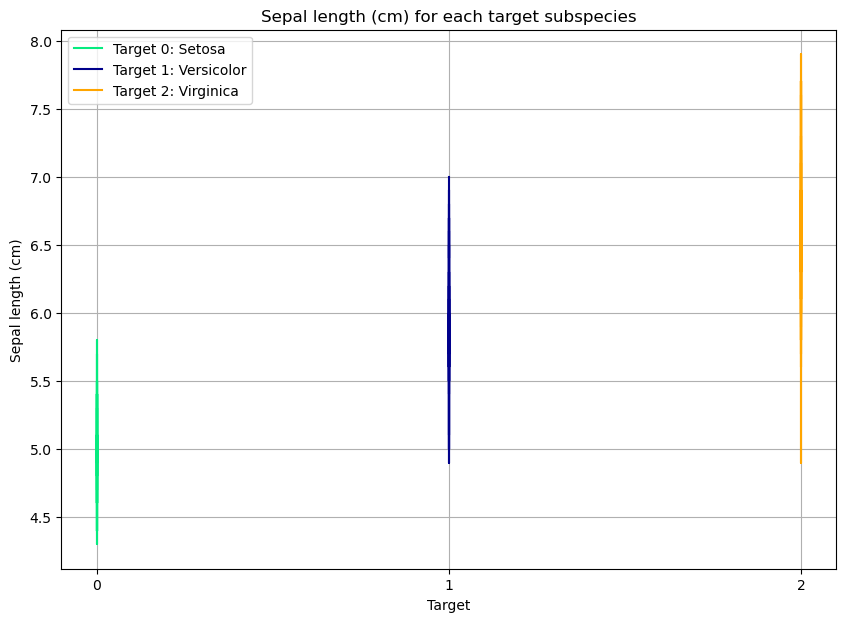

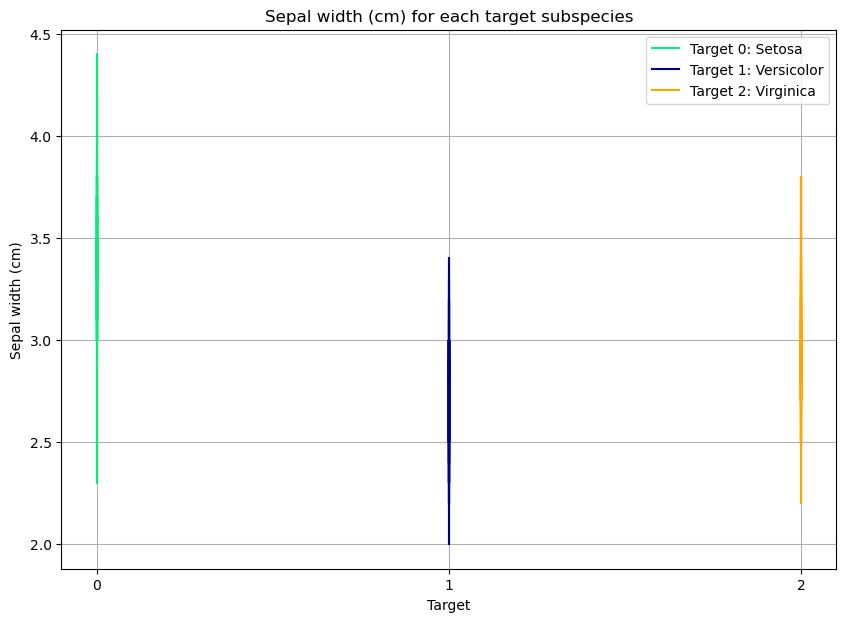

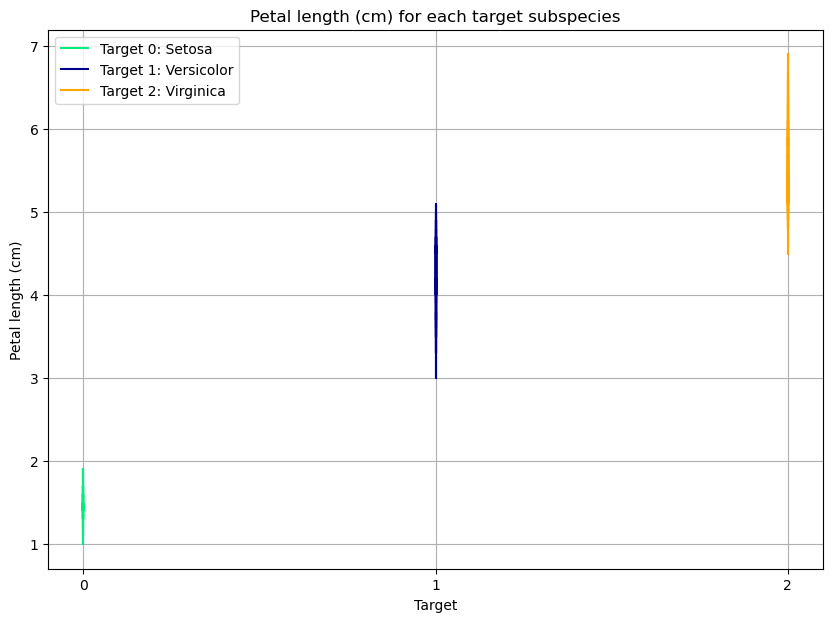

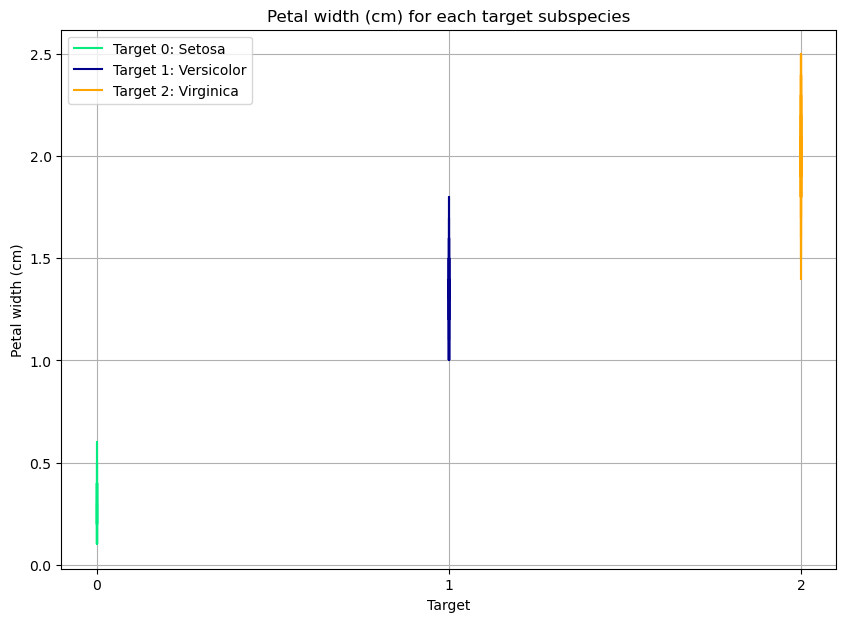

<Figure size 1000x700 with 0 Axes>

In [5]:
for column in feature_columns_list:
    # plt.figure(figsize = (10,7),dpi = 100)
    plt.rcParams["figure.figsize"] = (10,7)
    plt.rcParams["figure.dpi"] = 100
    plt.grid()

    plt.plot(dict_separate_datasets_per_target[0]["target"],dict_separate_datasets_per_target[0][column],color=list_name_and_color_per_target[0][1],label = "Target 0: "+list_name_and_color_per_target[0][0])
    plt.plot(dict_separate_datasets_per_target[1]["target"],dict_separate_datasets_per_target[1][column],color=list_name_and_color_per_target[1][1],label = "Target 1: "+list_name_and_color_per_target[1][0])
    plt.plot(dict_separate_datasets_per_target[2]["target"],dict_separate_datasets_per_target[2][column],color=list_name_and_color_per_target[2][1],label = "Target 2: "+list_name_and_color_per_target[2][0])
    plt.ylabel(column.capitalize())
    plt.xlabel("target".capitalize())
    plt.xticks([0,1,2])
    plt.legend()
    plt.title(f"{column.capitalize()} for each target subspecies")
    plt.show()
    
    plt.clf()


### Scatter Plot: Create a scatter plot to visualize the relationship between two variables. Create scatter plots for each pair of features, and color the points by species. Customize the plot by adding a title, labels for the x and y-axis, and a legend.

In [6]:
dict_separate_datasets_per_target = dict()

dict_separate_datasets_per_target[0] = iris_dataset.loc[iris_dataset["target"] == 0]
dict_separate_datasets_per_target[1] = iris_dataset.loc[iris_dataset["target"] == 1]
dict_separate_datasets_per_target[2] = iris_dataset.loc[iris_dataset["target"] == 2]

list_name_and_color_per_target = [(iris_data["target_names"][0].capitalize(),"#05eb7f"),(iris_data["target_names"][1].capitalize(),"#00008B"),(iris_data["target_names"][2].capitalize(),"#FFA500")]
feature_columns_list = list(iris_dataset.columns)
_ = feature_columns_list.pop()

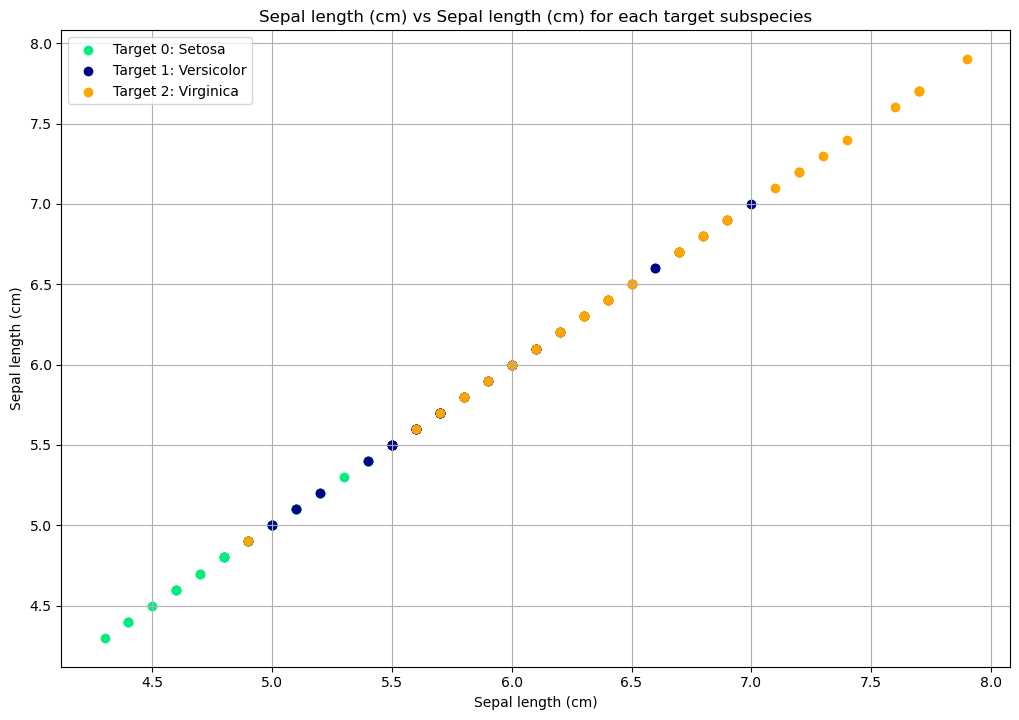

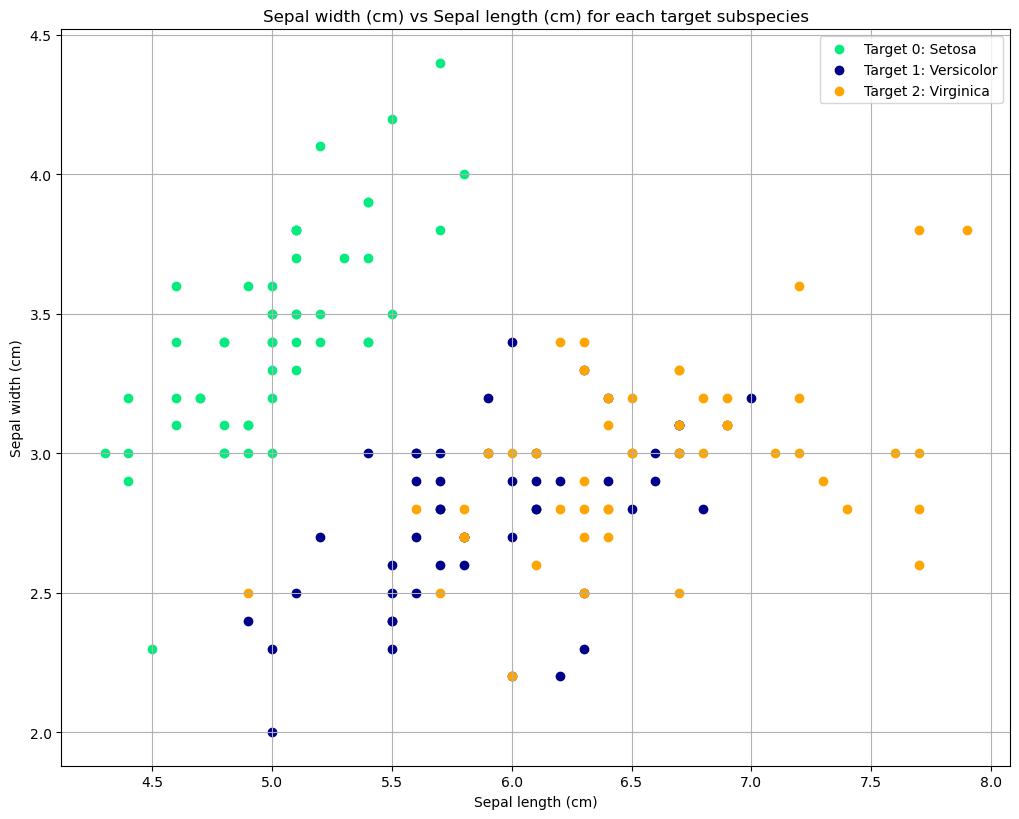

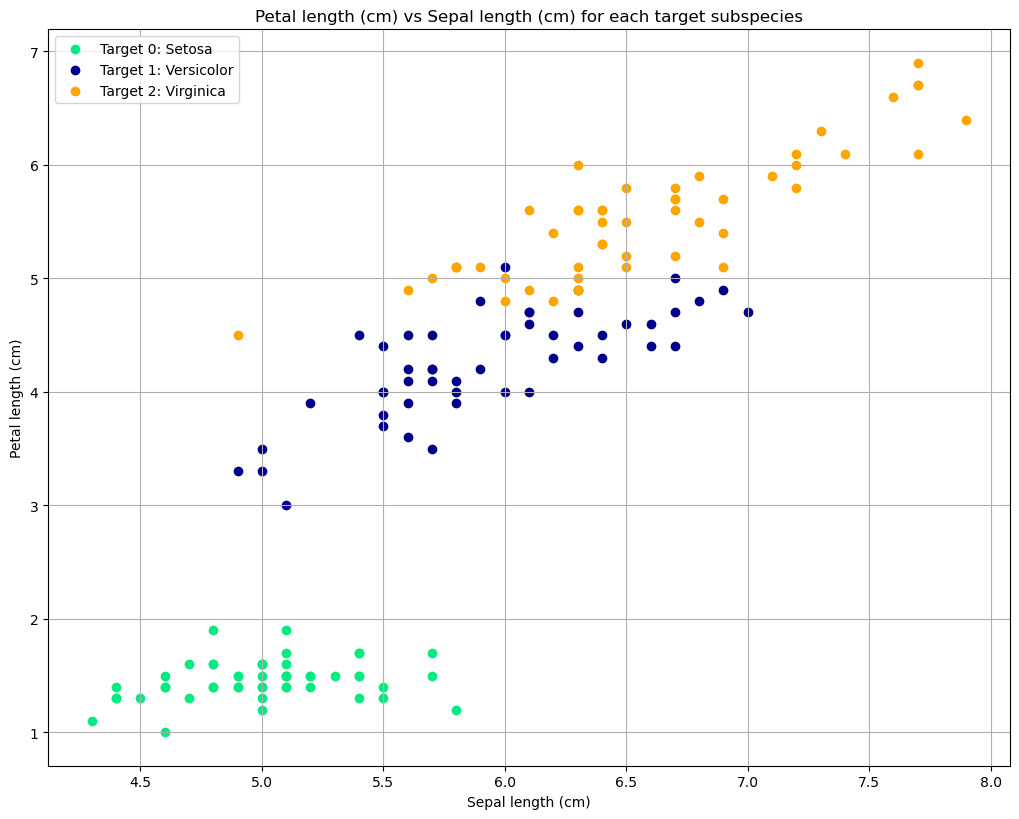

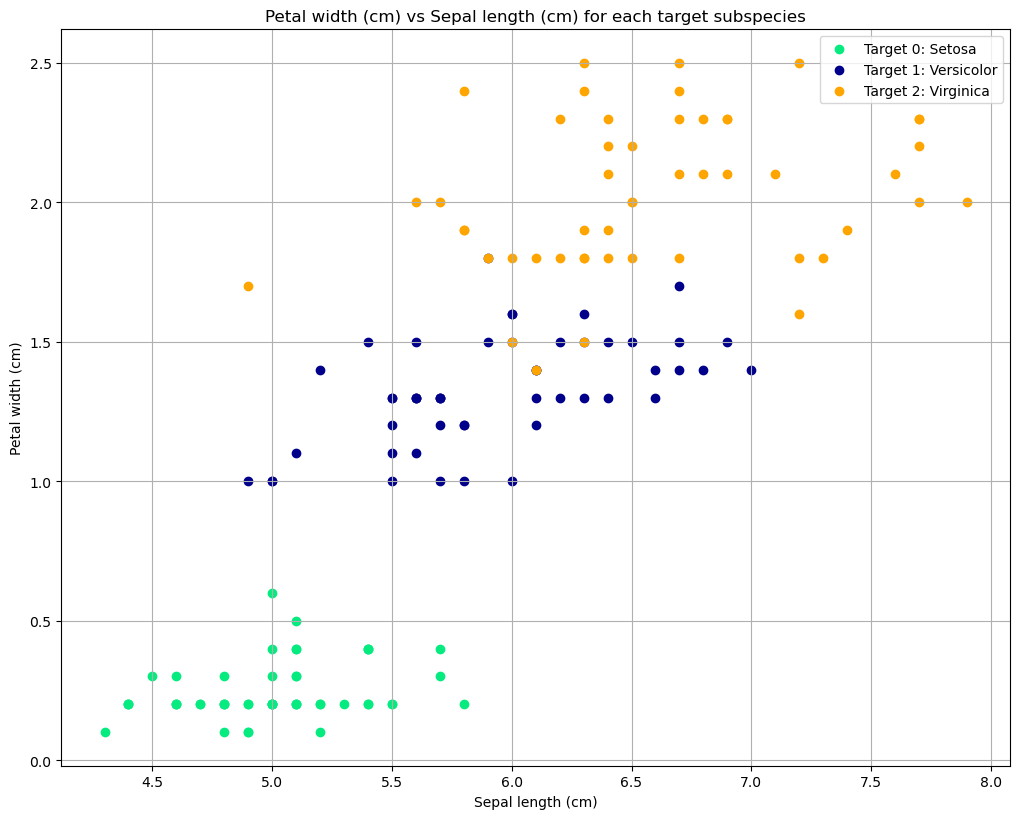

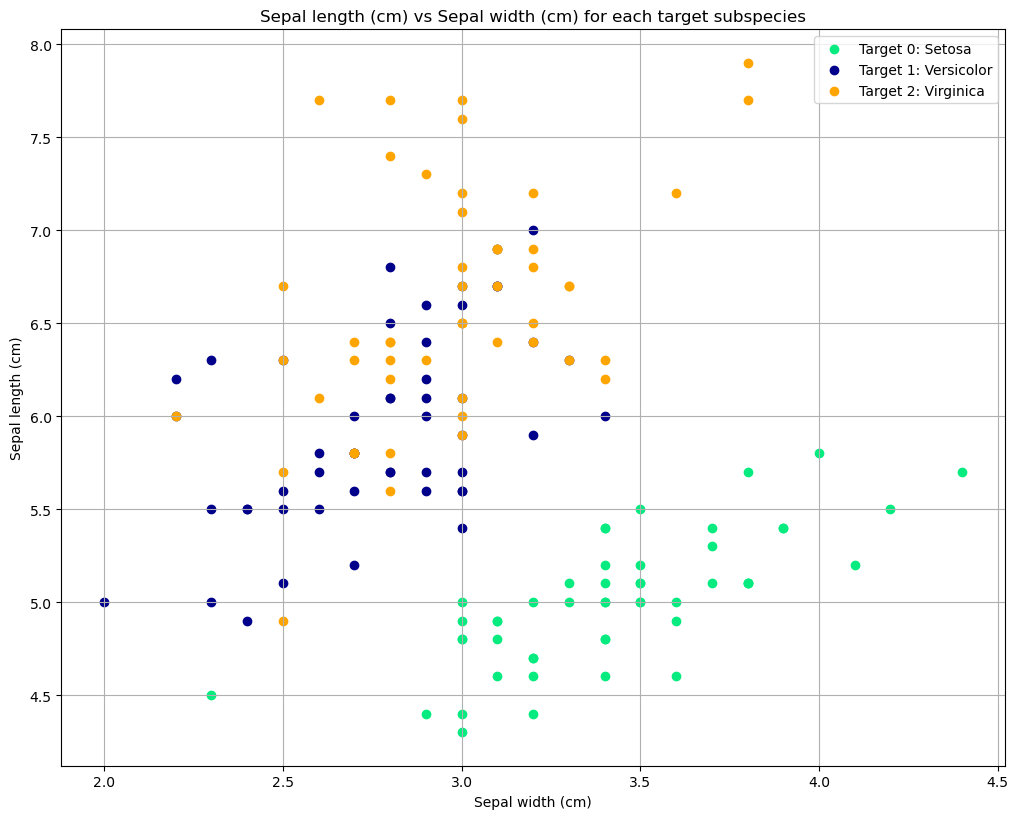

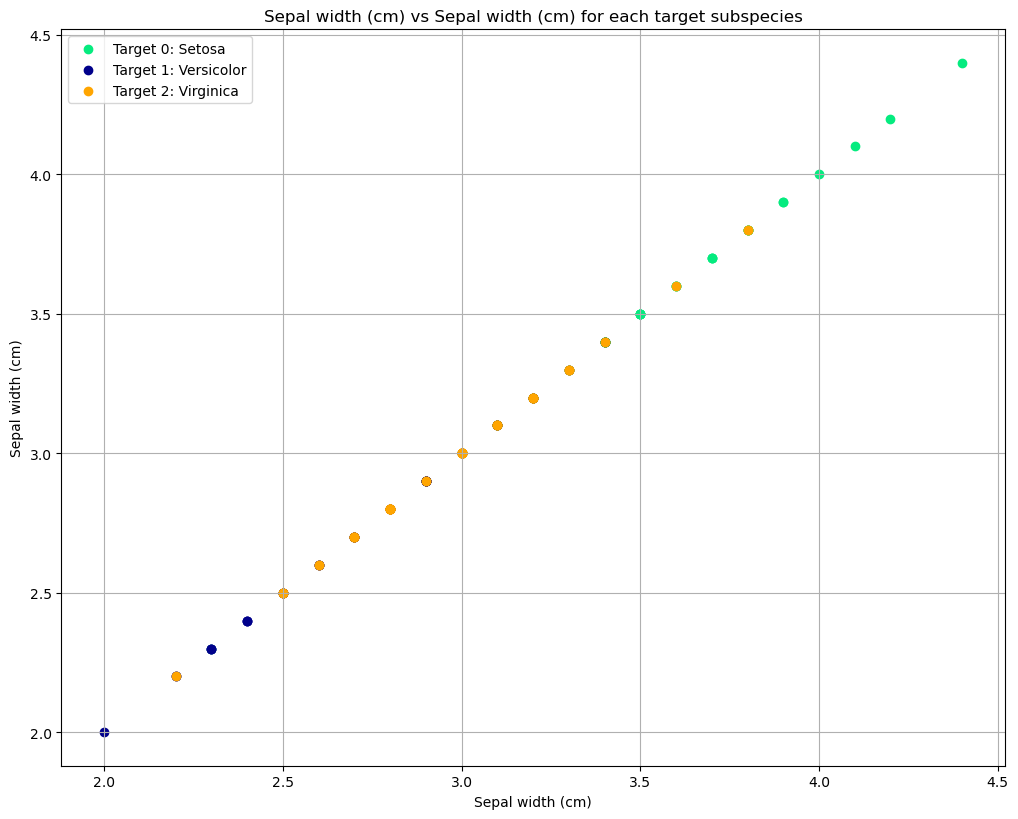

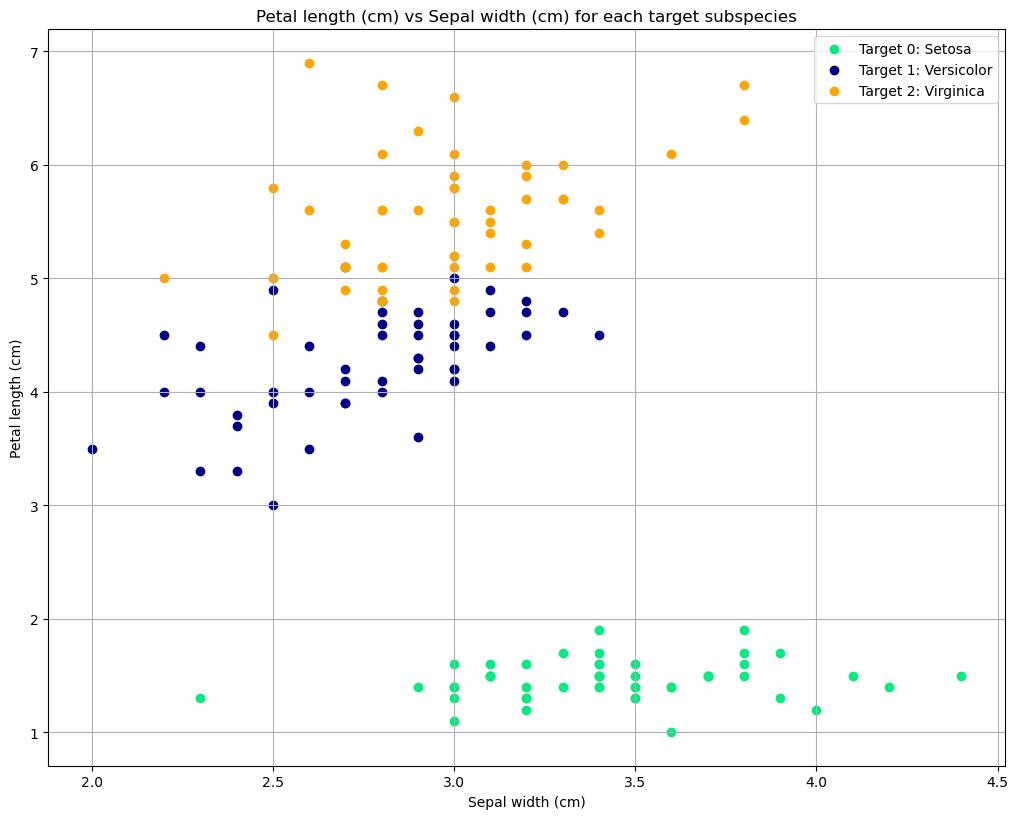

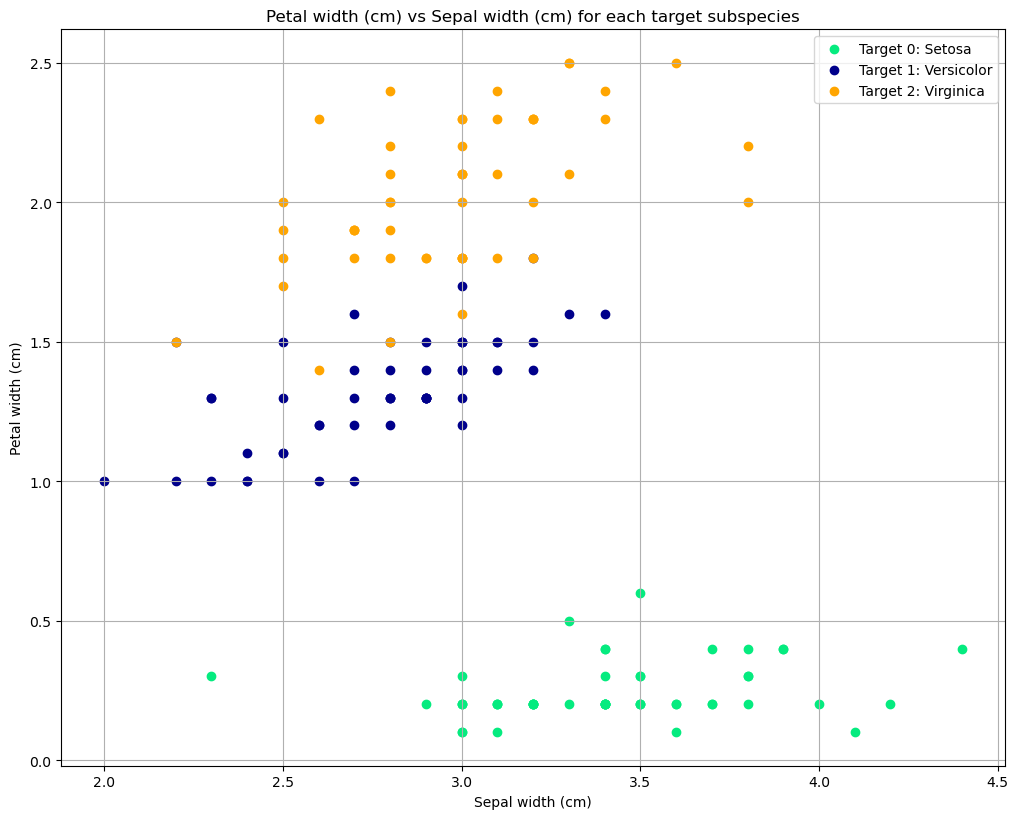

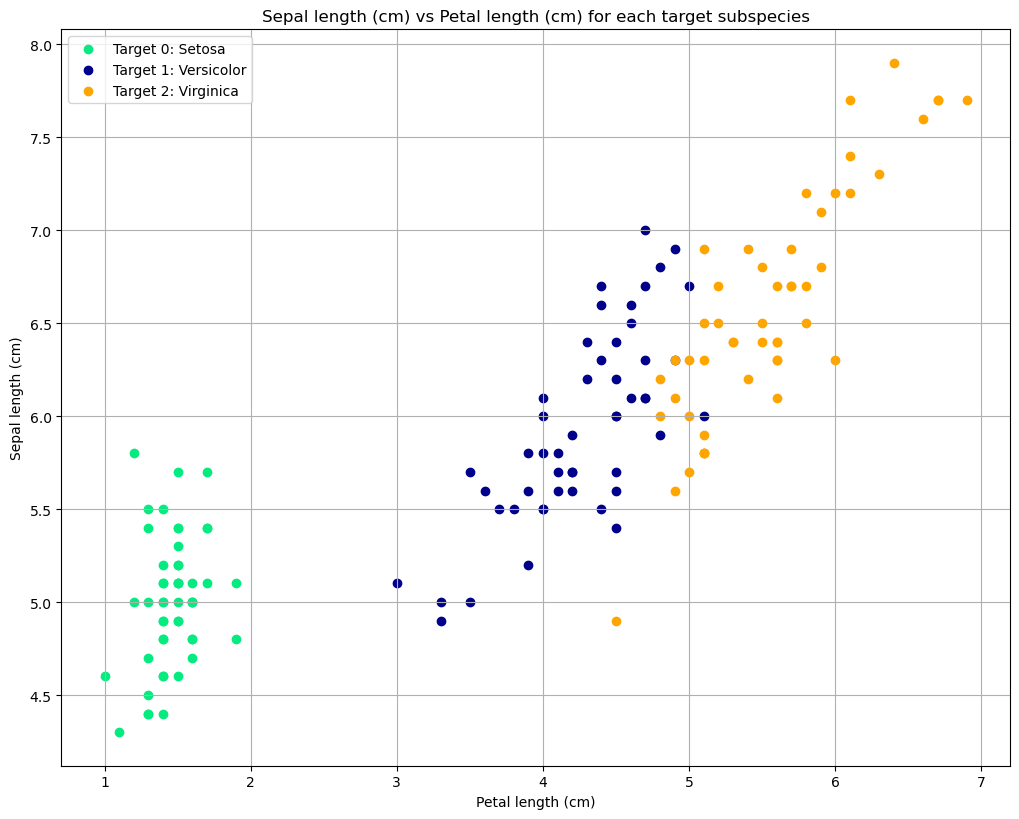

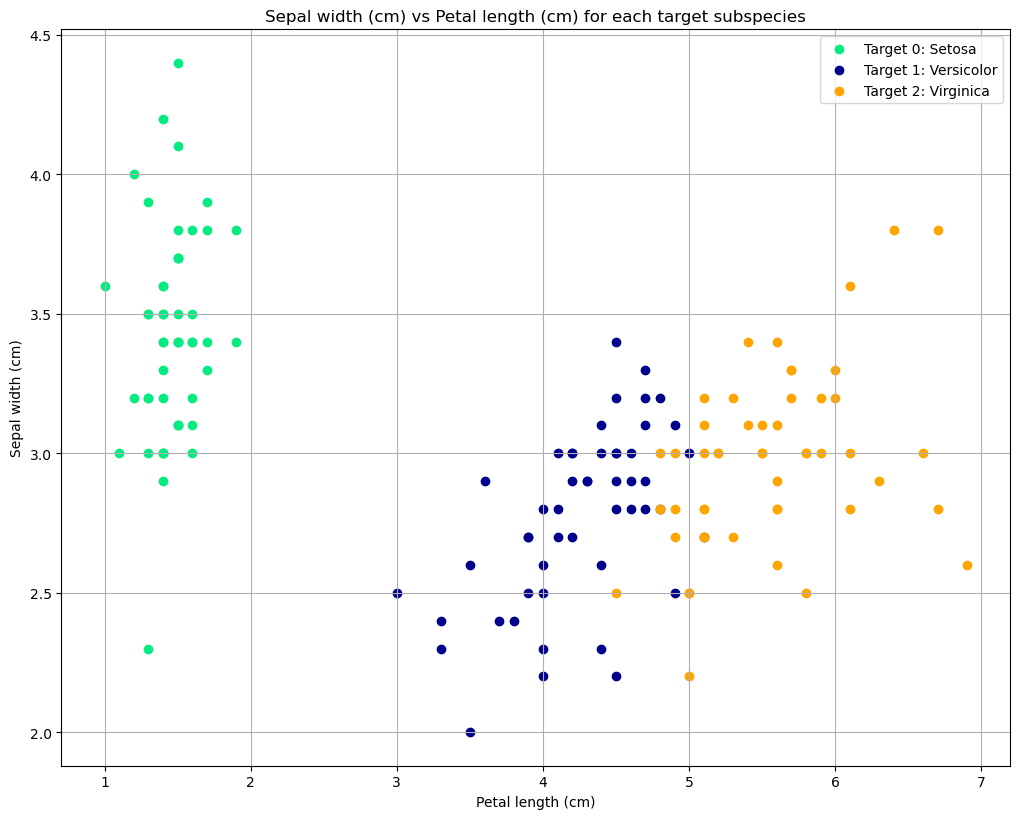

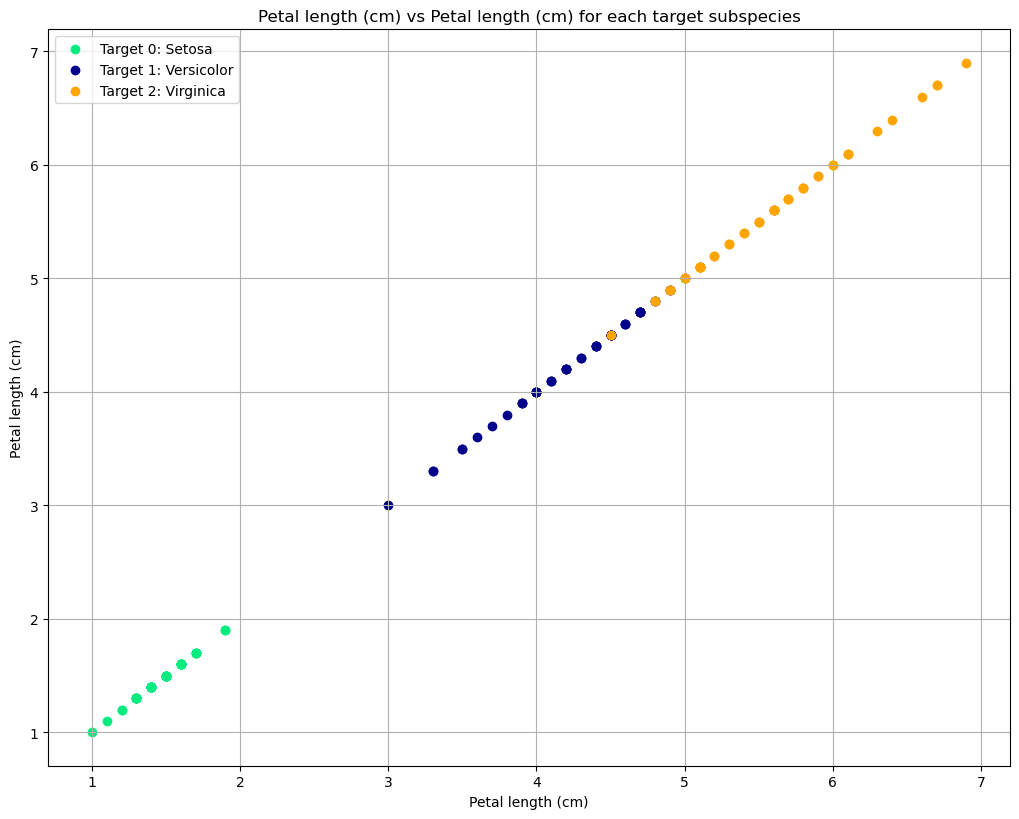

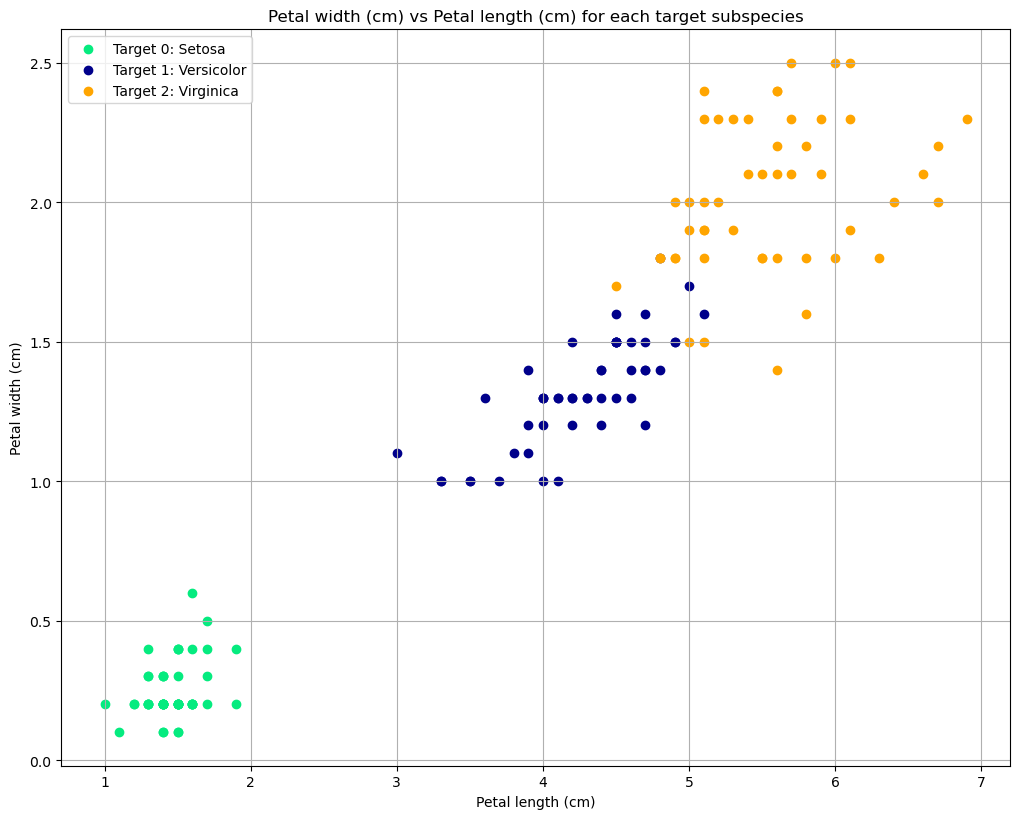

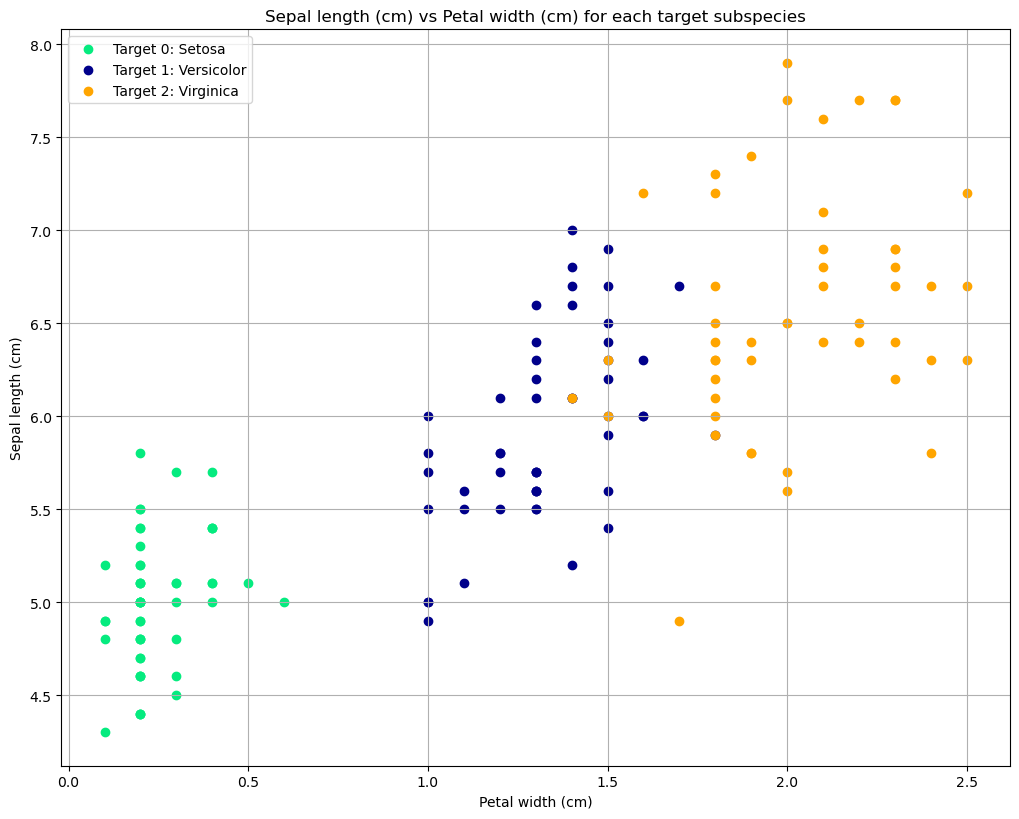

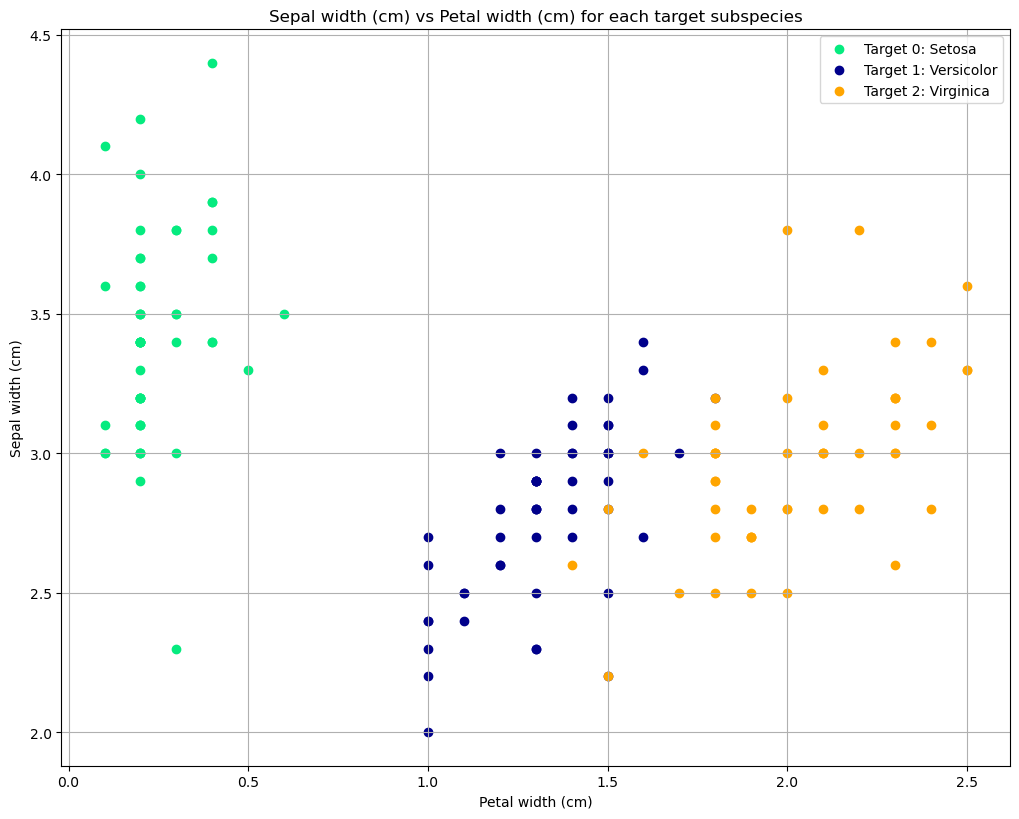

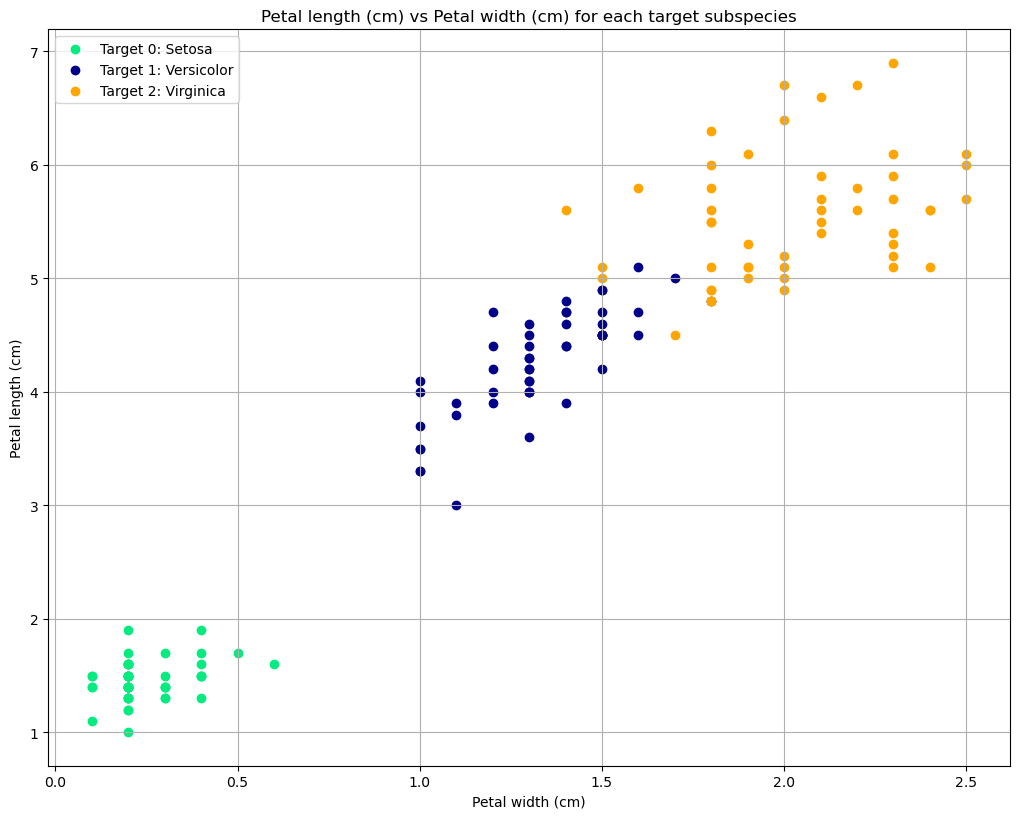

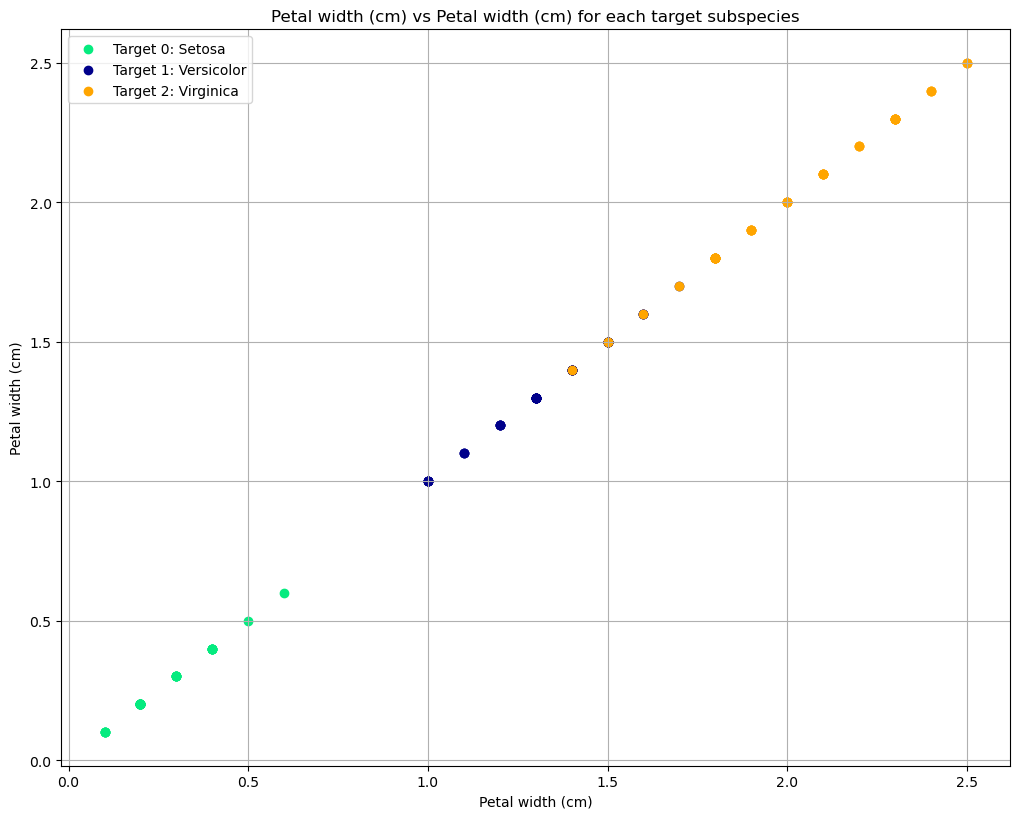

In [7]:
for x_value in feature_columns_list:
    for y_value in feature_columns_list:

        fig,ax = plt.subplots()
        plt.rcParams["figure.figsize"] = (10,8)
        plt.rcParams["figure.dpi"] = 100

        ax.grid()

        ax.scatter(dict_separate_datasets_per_target[0][x_value],dict_separate_datasets_per_target[0][y_value],color=list_name_and_color_per_target[0][1],label = "Target 0: "+list_name_and_color_per_target[0][0])
        ax.scatter(dict_separate_datasets_per_target[1][x_value],dict_separate_datasets_per_target[1][y_value],color=list_name_and_color_per_target[1][1],label = "Target 1: "+list_name_and_color_per_target[1][0])
        ax.scatter(dict_separate_datasets_per_target[2][x_value],dict_separate_datasets_per_target[2][y_value],color=list_name_and_color_per_target[2][1],label = "Target 2: "+list_name_and_color_per_target[2][0])
        ax.set_ylabel(y_value.capitalize())
        ax.set_xlabel(x_value.capitalize())
        ax.legend()
        ax.set_title(f"{y_value.capitalize()} vs {x_value.capitalize()} for each target subspecies")
        
        fig.tight_layout(pad = 0)

        plt.show()
        
        ax.cla()
        fig.clf()

### Histogram: Create a histogram to visualize the distribution of a single variable. Create histograms for each feature, and color the bars by species. Customize the plot by adding a title, labels for the x and y-axis, and setting the number of bins.

In [8]:
dict_separate_datasets_per_target = dict()

dict_separate_datasets_per_target[0] = iris_dataset.loc[iris_dataset["target"] == 0]
dict_separate_datasets_per_target[1] = iris_dataset.loc[iris_dataset["target"] == 1]
dict_separate_datasets_per_target[2] = iris_dataset.loc[iris_dataset["target"] == 2]

list_name_and_color_per_target = [(iris_data["target_names"][0].capitalize(),"#a74ff0"),(iris_data["target_names"][1].capitalize(),"#FFA500"),(iris_data["target_names"][2].capitalize(),"#05eb7f")]
feature_columns_list = list(iris_dataset.columns)
_ = feature_columns_list.pop()

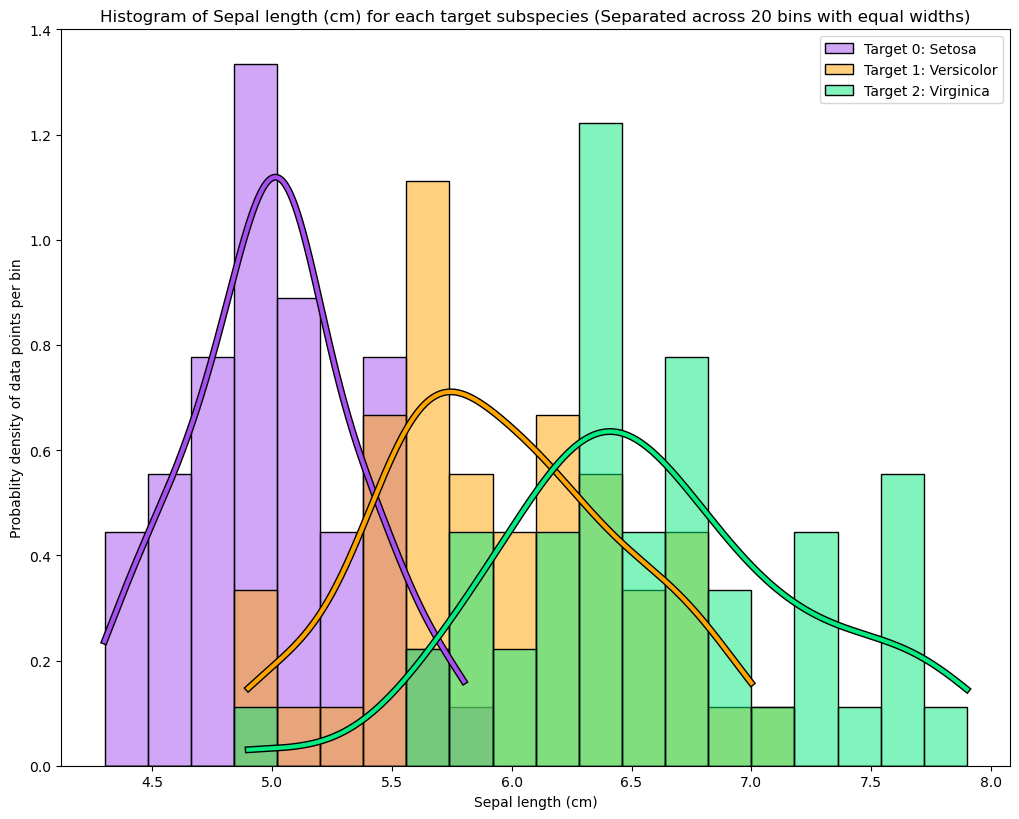

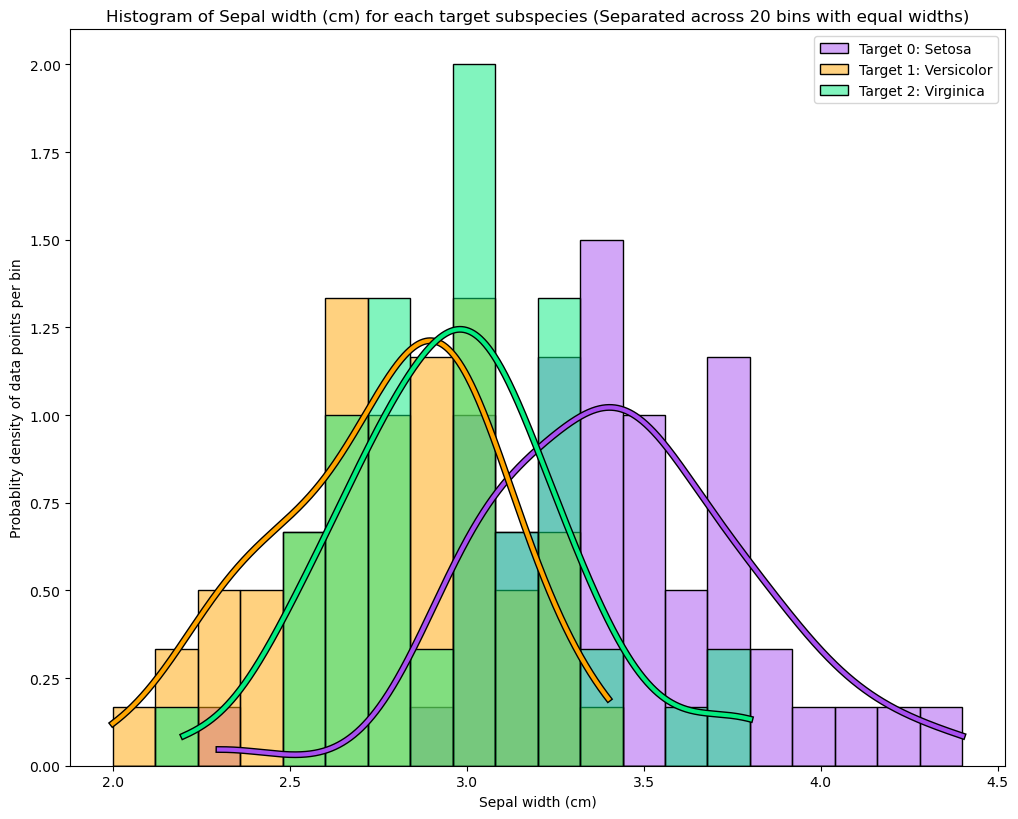

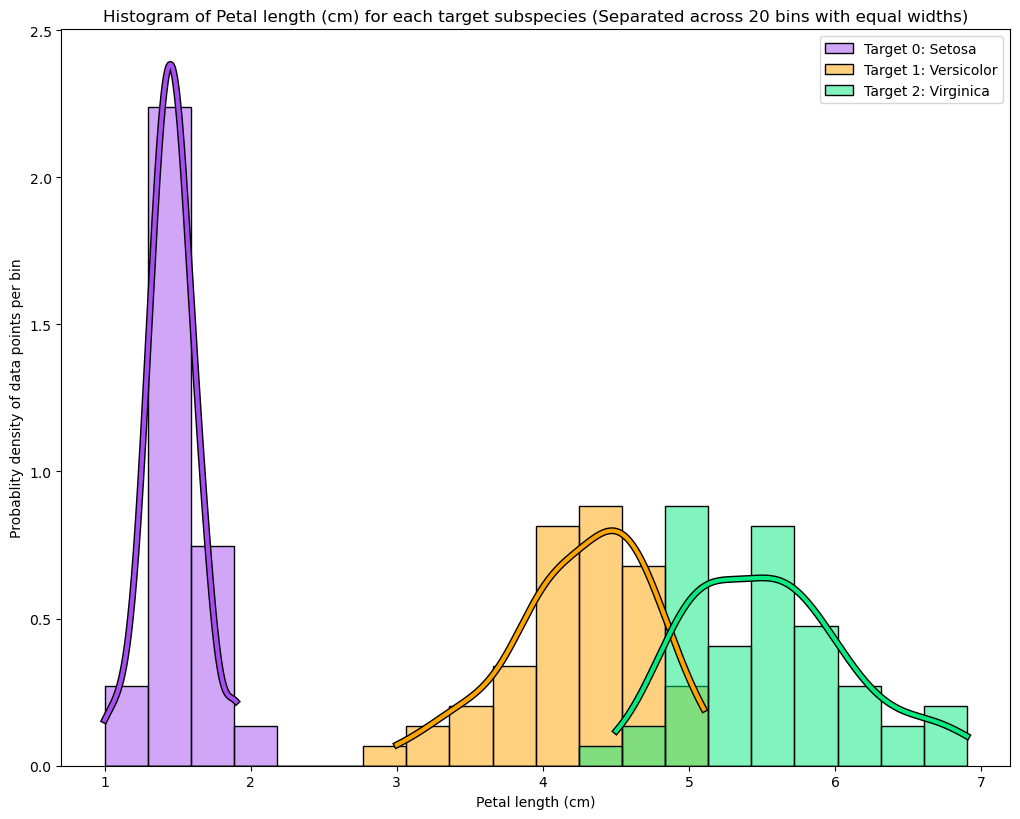

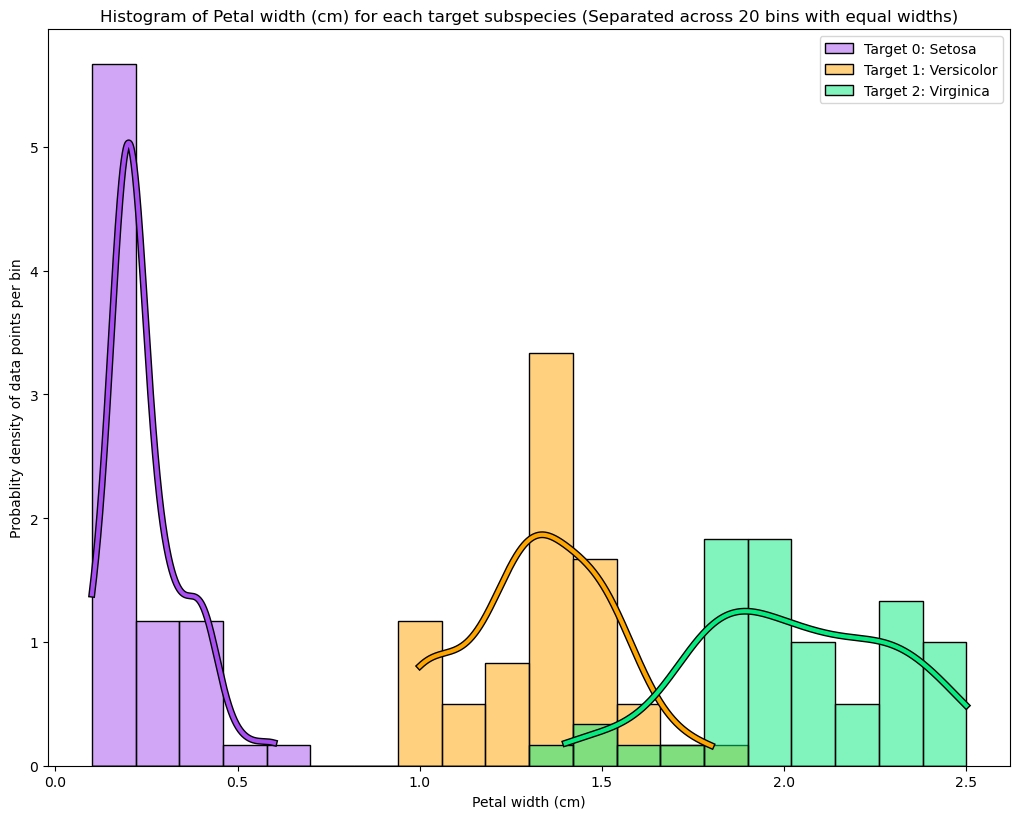

In [9]:
for column in feature_columns_list:

    fig,ax = plt.subplots()
    plt.rcParams["figure.figsize"] = (10,8)
    plt.rcParams["figure.dpi"] = 100

    bins = np.histogram(np.hstack((dict_separate_datasets_per_target[0][column],
                                   dict_separate_datasets_per_target[1][column],
                                   dict_separate_datasets_per_target[2][column])), bins = 20)[1]
    
    for i in range(3):

        kde = stats.gaussian_kde(dict_separate_datasets_per_target[i][column])
        x_kde = np.linspace(min(dict_separate_datasets_per_target[i][column]),max(dict_separate_datasets_per_target[i][column]),1000)
    
        ax.hist(dict_separate_datasets_per_target[i][column], bins, density=True, facecolor=list_name_and_color_per_target[i][1]+"80", edgecolor='black', linewidth=1, label=f"Target {i}: {list_name_and_color_per_target[i][0]}")
        ax.plot(x_kde,kde(x_kde),color = "black",lw = 5)
        ax.plot(x_kde,kde(x_kde),color = list_name_and_color_per_target[i][1],lw = 3)
    
    
    ax.set_ylabel("Probablity density of data points per bin")
    ax.set_xlabel(column.capitalize())
    ax.legend()
    ax.set_title(f"Histogram of {column.capitalize()} for each target subspecies (Separated across 20 bins with equal widths)")
        
    fig.tight_layout(pad = 0)

    plt.show()
    
    ax.cla()
    fig.clf()

### Bar Chart: Create a bar chart to visualize the frequency or count of a categorical variable. Create a bar chart for the target variable (species), showing the count of each species. Customize the plot by adding a title, labels for the x and y-axis, and changing the color scheme.

In [10]:
list_name_and_color_per_target = [(iris_data["target_names"][0].capitalize(),"#a74ff0"),(iris_data["target_names"][1].capitalize(),"#FFA500"),(iris_data["target_names"][2].capitalize(),"#05eb7f")]

In [11]:
target_column_frequencies = iris_dataset.value_counts("target")
target_column_frequencies

target
0    50
1    50
2    50
Name: count, dtype: int64

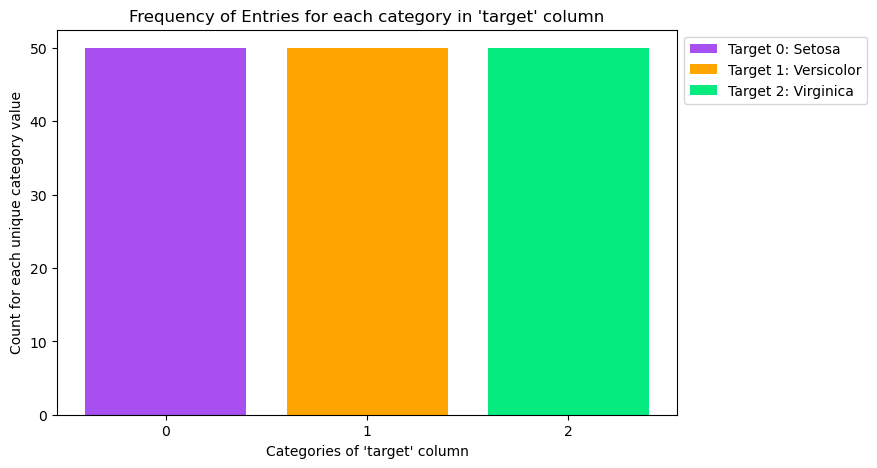

In [12]:
plt.rcParams["figure.figsize"] = (8,5)
plt.rcParams["figure.dpi"] = 100
plt.bar(target_column_frequencies.index, 
        target_column_frequencies.values, 
        label = ["Target 0: "+list_name_and_color_per_target[0][0],"Target 1: "+list_name_and_color_per_target[1][0],"Target 2: "+list_name_and_color_per_target[2][0]], 
        color = [list_name_and_color_per_target[0][1],list_name_and_color_per_target[1][1],list_name_and_color_per_target[2][1]])
plt.xticks([0,1,2])
plt.ylabel("Count for each unique category value")
plt.xlabel("Categories of 'target' column")
plt.title("Frequency of Entries for each category in 'target' column")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

### Heatmap: Create a heatmap to visualize the correlation between multiple variables. Create a heatmap showing the correlation matrix between the features. Customize the plot by adding a title and changing the color scheme.

In [13]:
feature_columns_list = list(iris_dataset.columns)
_ = feature_columns_list.pop()

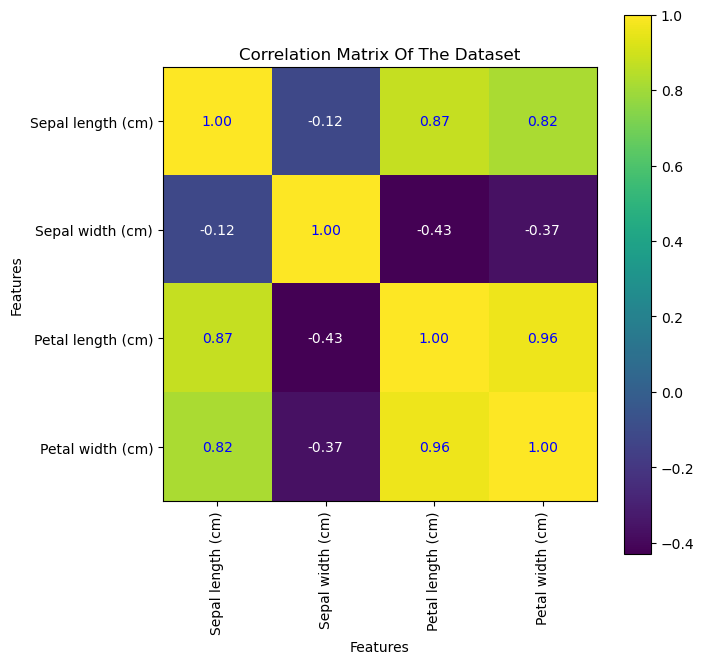

In [14]:

plt.figure(figsize=(7,7),dpi=100)

# Calculate correlation between columns
corr_matrix = iris_dataset[feature_columns_list].corr()
values_matrix=np.array(corr_matrix.iloc[:,:])

# Plot the heatmap
plt.imshow(corr_matrix, cmap="viridis")
for i in range(len(values_matrix)):
    for j in range(len(values_matrix)):
        if values_matrix[i, j] > 0.3:
            text = plt.text(j, i, '%.2f' % values_matrix[i, j],
                           ha="center", va="center", color="b")
        else:
            text = plt.text(j, i, '%.2f' % values_matrix[i, j],
                           ha="center", va="center", color="w")

plt.colorbar()
 
# Set plot title and axis labels
plt.title("Correlation Matrix Of The Dataset")
plt.xlabel("Features")
plt.ylabel("Features")
 
# Set tick labels
plt.xticks(range(len(corr_matrix.columns)),[column.capitalize() for column in corr_matrix.columns], rotation=90)
plt.yticks(range(len(corr_matrix.columns)),[column.capitalize() for column in corr_matrix.columns])
 
# Display the plot
plt.show()

### Bonus: Choose a different dataset and create a unique visualization using Matplotlib. Be creative!

In [15]:
if os.path.exists("gas_prices.csv") != True:
    od.download("https://raw.githubusercontent.com/KeithGalli/matplotlib_tutorial/master/gas_prices.csv")

In [16]:
gas=pd.read_csv("gas_prices.csv")
gas

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
0,1990,NaN,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16
1,1991,1.96,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14
2,1992,1.89,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
3,1993,1.73,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11
4,1994,1.84,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11
5,1995,1.95,1.53,4.26,3.96,4.00,4.43,1.11,2.94,3.21,1.15
6,1996,2.12,1.61,4.41,3.94,4.39,3.64,1.25,3.18,3.34,1.23
7,1997,2.05,1.62,4.00,3.53,4.07,3.26,1.47,3.34,3.83,1.23
8,1998,1.63,1.38,3.87,3.34,3.84,2.82,1.49,3.04,4.06,1.06
9,1999,1.72,1.52,3.85,3.42,3.87,3.27,1.79,3.80,4.29,1.17


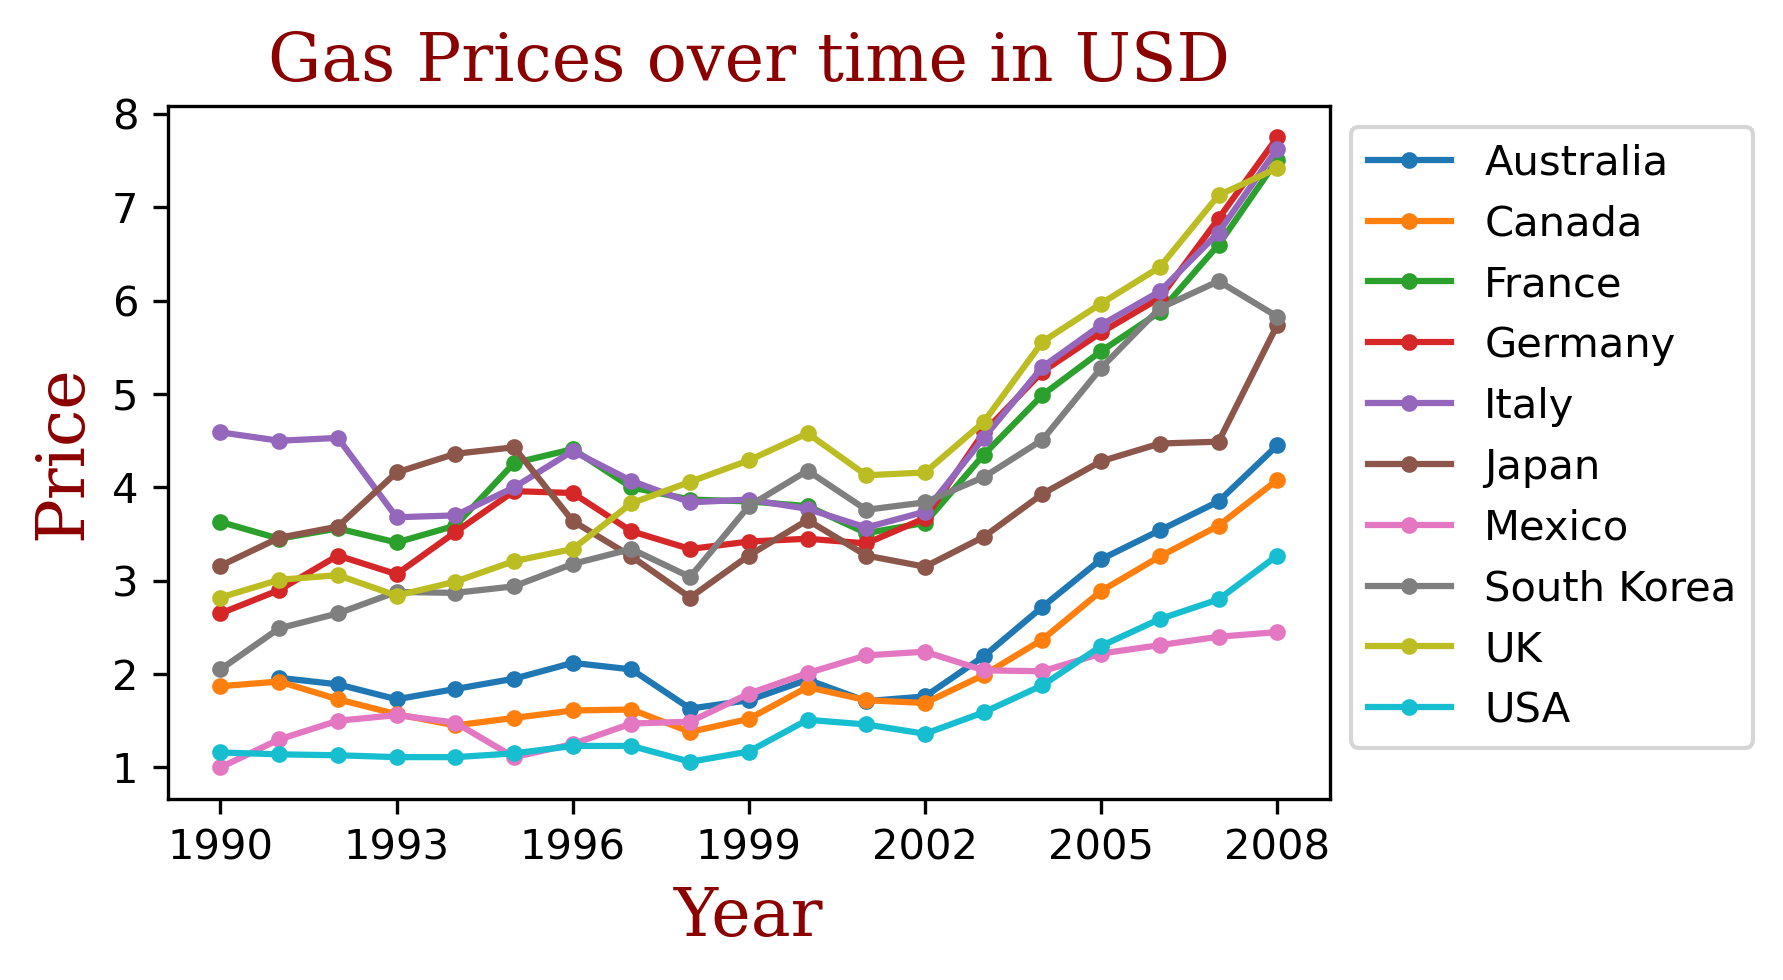

In [17]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.figure(figsize=(5,3),dpi=300)
plt.title("Gas Prices over time in USD",fontdict=font)
for country in gas.columns[1:]:
    plt.plot(gas.Year,gas[country],".-",label=country)
plt.xticks(gas["Year"][::3])
plt.xlabel("Year",fontdict=font)
plt.ylabel("Price",fontdict=font)
plt.legend(bbox_to_anchor=(1.0, 1.0))# To show legend outside
plt.show()

<b>Part 2 : Handling Null Values in Python with Pandas</b>

Objective: In this assignment, you will learn how to handle null values in a dataset using Python with the Pandas library. You will practice different techniques such as identifying null values, dropping null values, filling null values, and using interpolation methods. You will use the "California Housing Prices" dataset from Scikit-learn.

Tasks:
    
1. Import the necessary libraries: Start by importing the required libraries, including Pandas, NumPy, and Scikit-learn.

2. Load the dataset: Load the California Housing Prices(fetch_california_housing) dataset from sklearn.datasets convert that into a pandas DataFrame using Scikit-learn. The dataset contains 20,640 rows and 8 columns.

3. Identify Null Values: Check the dataset for any missing values and count the number of missing values in each column.

4. Dropping Null Values: Remove any rows that have missing values.

5. Filling Null Values: Replace the missing values in the "total_bedrooms" column with the median value of the column.

6. Interpolation: Fill the missing values in the "total_bedrooms" column using interpolation. Visualize the interpolated values using a line plot.

7. Bonus: Choose a different dataset and handle null values using different techniques. Be creative!

Submission:
    
Submit a Jupyter Notebook file (.ipynb) containing your code, a brief explanation of your thought process for each task, and any necessary comments for clarity. Make sure to test your code and provide examples of the output for each task.

### Import the necessary libraries: Start by importing the required libraries, including Pandas, NumPy, and Scikit-learn.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

### Load the dataset: Load the Cmalifornia Housing Prices(fetch_california_housing) dataset from sklearn.datasets convert that into a pandas DataFrame using Scikit-learn. The dataset contains 20,640 rows and 8 columns.

In [19]:
housing_data = fetch_california_housing(as_frame = True)["data"]
housing_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


### Identify Null Values: Check the dataset for any missing values and count the number of missing values in each column.

In [20]:
housing_data.info() #No null values present in any of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [21]:
housing_data.isnull().sum() #No null values present in any of the columns

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [22]:
# The housing data from sklearn didnt have columns with any null values
#So, using the dataset which was provided to us during live session instead which contains null values
housing_data = pd.read_csv("Housing Data.csv",low_memory=False)
housing_data

,No,Type,Region,MunicipalityCode,Prefecture,Municipality,DistrictName,NearestStation,TimeToNearestStation,MinTimeToNearestStation,...,Classification,Breadth,CityPlanning,CoverageRatio,FloorAreaRatio,Period,Year,Quarter,Renovation,Remarks
0,1,Residential Land(Land and Building),Residential Area,2201,Aomori Prefecture,Aomori City,Aoba,Aomori,30-60minutes,30.0,...,City Road,9.5,Category I Exclusively Low-story Residential Zone,50.0,80.0,4th quarter 2018,2018,4,NaN,NaN
1,2,Residential Land(Land and Building),Residential Area,2201,Aomori Prefecture,Aomori City,Aoba,Aomori,30-60minutes,30.0,...,City Road,9.5,Category I Exclusively Low-story Residential Zone,50.0,80.0,2nd quarter 2018,2018,2,NaN,NaN
2,3,Residential Land(Land and Building),Commercial Area,2201,Aomori Prefecture,Aomori City,Aoba,Aomori,30-60minutes,30.0,...,National Highway,24.0,Quasi-residential Zone,60.0,200.0,1st quarter 2014,2014,1,NaN,NaN
3,4,Residential Land(Land and Building),Residential Area,2201,Aomori Prefecture,Aomori City,Aoba,Tsutsui (Aomori),25,25.0,...,City Road,8.0,Category I Exclusively Low-story Residential Zone,50.0,80.0,2nd quarter 2018,2018,2,NaN,NaN
4,5,Residential Land(Land and Building),Residential Area,2201,Aomori Prefecture,Aomori City,Aoba,Tsutsui (Aomori),25,25.0,...,City Road,6.5,Category I Exclusively Medium-high Residential...,60.0,200.0,1st quarter 2018,2018,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52403,52404,Agricultural Land,NaN,2450,Aomori Prefecture,"Shingo Village,Sannohe County",Oaza Herai,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2nd quarter 2009,2009,2,NaN,NaN
52404,52405,Forest Land,NaN,2450,Aomori Prefecture,"Shingo Village,Sannohe County",Oaza Herai,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1st quarter 2009,2009,1,NaN,NaN
52405,52406,Forest Land,NaN,2450,Aomori Prefecture,"Shingo Village,Sannohe County",Oaza Herai,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1st quarter 2009,2009,1,NaN,NaN
52406,52407,Agricultural Land,NaN,2450,Aomori Prefecture,"Shingo Village,Sannohe County",Oaza Herai,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1st quarter 2009,2009,1,NaN,NaN


In [23]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52408 entries, 0 to 52407
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   No                           52408 non-null  int64  
 1   Type                         52408 non-null  object 
 2   Region                       31979 non-null  object 
 3   MunicipalityCode             52408 non-null  int64  
 4   Prefecture                   52408 non-null  object 
 5   Municipality                 52408 non-null  object 
 6   DistrictName                 52337 non-null  object 
 7   NearestStation               31866 non-null  object 
 8   TimeToNearestStation         31832 non-null  object 
 9   MinTimeToNearestStation      31832 non-null  float64
 10  MaxTimeToNearestStation      28977 non-null  float64
 11  SalesPrice                   52408 non-null  int64  
 12  FloorPlan                    650 non-null    object 
 13  Area            

In [24]:
housing_data.isnull().sum()

No                                 0
Type                               0
Region                         20429
MunicipalityCode                   0
Prefecture                         0
Municipality                       0
DistrictName                      71
NearestStation                 20542
TimeToNearestStation           20576
MinTimeToNearestStation        20576
MaxTimeToNearestStation        23431
SalesPrice                         0
FloorPlan                      51758
Area                               0
AreaIsGreaterFlag                  0
UnitPrice                      34229
PricePerTsubo                  34229
LandShape                      20493
Frontage                       23467
FrontageIsGreaterFlag              0
TotalFloorArea                 39426
TotalFloorAreaIsGreaterFlag        0
BuildingYear                   39224
PrewarBuilding                     0
Structure                      38936
Use                            38977
Purpose                        41177
D

### Dropping Null Values: Remove any rows that have missing values.

In [25]:
housing_data.dropna(inplace = True)
housing_data ### Deletes all rows which means every single entry has atleast one column value which is null

,No,Type,Region,MunicipalityCode,Prefecture,Municipality,DistrictName,NearestStation,TimeToNearestStation,MinTimeToNearestStation,...,Classification,Breadth,CityPlanning,CoverageRatio,FloorAreaRatio,Period,Year,Quarter,Renovation,Remarks


In [26]:
housing_data = pd.read_csv("Housing Data.csv",low_memory = False) #Loading the data once again
housing_data

,No,Type,Region,MunicipalityCode,Prefecture,Municipality,DistrictName,NearestStation,TimeToNearestStation,MinTimeToNearestStation,...,Classification,Breadth,CityPlanning,CoverageRatio,FloorAreaRatio,Period,Year,Quarter,Renovation,Remarks
0,1,Residential Land(Land and Building),Residential Area,2201,Aomori Prefecture,Aomori City,Aoba,Aomori,30-60minutes,30.0,...,City Road,9.5,Category I Exclusively Low-story Residential Zone,50.0,80.0,4th quarter 2018,2018,4,NaN,NaN
1,2,Residential Land(Land and Building),Residential Area,2201,Aomori Prefecture,Aomori City,Aoba,Aomori,30-60minutes,30.0,...,City Road,9.5,Category I Exclusively Low-story Residential Zone,50.0,80.0,2nd quarter 2018,2018,2,NaN,NaN
2,3,Residential Land(Land and Building),Commercial Area,2201,Aomori Prefecture,Aomori City,Aoba,Aomori,30-60minutes,30.0,...,National Highway,24.0,Quasi-residential Zone,60.0,200.0,1st quarter 2014,2014,1,NaN,NaN
3,4,Residential Land(Land and Building),Residential Area,2201,Aomori Prefecture,Aomori City,Aoba,Tsutsui (Aomori),25,25.0,...,City Road,8.0,Category I Exclusively Low-story Residential Zone,50.0,80.0,2nd quarter 2018,2018,2,NaN,NaN
4,5,Residential Land(Land and Building),Residential Area,2201,Aomori Prefecture,Aomori City,Aoba,Tsutsui (Aomori),25,25.0,...,City Road,6.5,Category I Exclusively Medium-high Residential...,60.0,200.0,1st quarter 2018,2018,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52403,52404,Agricultural Land,NaN,2450,Aomori Prefecture,"Shingo Village,Sannohe County",Oaza Herai,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2nd quarter 2009,2009,2,NaN,NaN
52404,52405,Forest Land,NaN,2450,Aomori Prefecture,"Shingo Village,Sannohe County",Oaza Herai,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1st quarter 2009,2009,1,NaN,NaN
52405,52406,Forest Land,NaN,2450,Aomori Prefecture,"Shingo Village,Sannohe County",Oaza Herai,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1st quarter 2009,2009,1,NaN,NaN
52406,52407,Agricultural Land,NaN,2450,Aomori Prefecture,"Shingo Village,Sannohe County",Oaza Herai,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1st quarter 2009,2009,1,NaN,NaN


### Filling Null Values: Replace the missing values in the "total_bedrooms" column with the median value of the column.

In [27]:
#There's no "total_bedrooms" column in this dataset or the one from sklearn.datasets
#Using the "Frontage" column instead
frontage_column = housing_data[["Frontage"]].copy()
frontage_column.head()

,Frontage
0,13.5
1,23.5
2,26.5
3,NaN
4,12.5


In [28]:
frontage_column["Frontage_median"] = frontage_column["Frontage"].fillna(frontage_column["Frontage"].median())
frontage_column

,Frontage,Frontage_median
0,13.5,13.5
1,23.5,23.5
2,26.5,26.5
3,NaN,14.5
4,12.5,12.5
...,...,...
52403,NaN,14.5
52404,NaN,14.5
52405,NaN,14.5
52406,NaN,14.5


In [29]:
frontage_column.isnull().sum()

Frontage           23467
Frontage_median        0
dtype: int64

### Interpolation: Fill the missing values in the "total_bedrooms" column using interpolation. Visualize the interpolated values using a line plot.

In [30]:
#There's no "total_bedrooms" column in this dataset or the one from sklearn.datasets
#Using the "Frontage" column instead
frontage_column["Frontage_interpolate"] = frontage_column["Frontage"].interpolate()
frontage_column

,Frontage,Frontage_median,Frontage_interpolate
0,13.5,13.5,13.5
1,23.5,23.5,23.5
2,26.5,26.5,26.5
3,NaN,14.5,19.5
4,12.5,12.5,12.5
...,...,...,...
52403,NaN,14.5,17.5
52404,NaN,14.5,17.5
52405,NaN,14.5,17.5
52406,NaN,14.5,17.5


In [31]:
frontage_column.isnull().sum()

Frontage                23467
Frontage_median             0
Frontage_interpolate        0
dtype: int64

### Bonus: Choose a different dataset and create a unique visualization using Matplotlib. Be creative!

In [38]:
import pandas as pd
import numpy as np

# Create a sample dataset with 1000 rows
make_list = ['Toyota', 'Honda', 'Ford', 'Chevrolet', 'Nissan', 'BMW', 'Mercedes-Benz', 'Audi', 'Volkswagen', 'Subaru']
model_list = ['Camry', 'Civic', 'Mustang', 'Corvette', 'Altima', '3 Series', 'C-Class', 'A4', 'Golf', 'Outback']
year_list = list(range(2010, 2024))

data = {
    'Make': np.random.choice(make_list, size=1000, replace=True),
    'Model': np.random.choice(model_list, size=1000, replace=True),
    'Year': [np.random.choice(year_list) if np.random.rand() > 0.1 else None for _ in range(1000)],
    'Engine Displacement (L)': [np.round(np.random.uniform(1.0, 6.5), 1) if np.random.rand() > 0.1 else None for _ in range(1000)],
    'MPG': [np.random.randint(15, 40) if np.random.rand() > 0.1 else None for _ in range(1000)]
}

cars_df = pd.DataFrame(data)

In [39]:
cars_df

,Make,Model,Year,Engine Displacement (L),MPG
0,Subaru,3 Series,2015.0,1.2,23.0
1,BMW,Outback,2016.0,5.0,37.0
2,Ford,Camry,2021.0,5.5,26.0
3,Toyota,Camry,2016.0,6.5,29.0
4,Audi,C-Class,2017.0,NaN,39.0
...,...,...,...,...,...
995,BMW,Mustang,2016.0,5.5,29.0
996,Nissan,Mustang,2021.0,1.5,30.0
997,Nissan,Camry,2016.0,2.5,20.0
998,BMW,Corvette,2017.0,6.2,NaN


In [40]:
cars_df.isnull().sum()

Make                         0
Model                        0
Year                        85
Engine Displacement (L)     92
MPG                        104
dtype: int64

In [41]:
def handle_null_values(df,threshold_percent=50):
    modified_df = df.copy()
    threshold_value = (threshold_percent/100)*modified_df.shape[0]
    
    columns_to_be_dropped = []
    for column in modified_df:
        if modified_df[column].isnull().sum() > threshold_value:
            columns_to_be_dropped.append(column)
    modified_df.drop(columns_to_be_dropped, axis = 1, inplace = True)
    
    numeric_columns = list(modified_df.select_dtypes(include=['number']).columns)
    
    method_with_smallest_std_diff = ""
    for column in numeric_columns:
        
        original_column_std = np.std(modified_df[column])
        methods_info_dict = {"mean":{"filled_column":modified_df[column].fillna(modified_df[column].mean()),"std":None},
                             "median":{"filled_column":modified_df[column].fillna(modified_df[column].median()),"std":None},
                             "mode":{"filled_column":modified_df[column].fillna(modified_df[column].mode()[0]),"std":None},
                             "interpolate":{"filled_column":modified_df[column].interpolate(),"std":None}}
      
        if modified_df[column].iloc[0] != None:
            methods_info_dict["ffill"] = {"filled_column":modified_df[column].fillna(method = "ffill"),"std":None}
        if modified_df[column].iloc[-1] != None:
            methods_info_dict["bfill"] = {"filled_column":modified_df[column].fillna(method = "bfill"),"std":None}
        
        method_with_smallest_std_diff = "mean"
        methods_info_dict["mean"]["std"] = np.std(methods_info_dict["mean"]["filled_column"])
        smallest_std_diff = abs(original_column_std - methods_info_dict["mean"]["std"])
        
        for key in methods_info_dict.keys():
            methods_info_dict[key]["std"] = np.std(methods_info_dict[key]["filled_column"])
            if smallest_std_diff > abs(original_column_std - methods_info_dict[key]["std"]):
                method_with_smallest_std_diff = key
                smallest_std_diff = abs(original_column_std - methods_info_dict[key]["std"])
        
        modified_df[column] = methods_info_dict[method_with_smallest_std_diff]["filled_column"]
        del methods_info_dict
                
    return modified_df

In [42]:
cars_df = handle_null_values(cars_df)
cars_df

,Make,Model,Year,Engine Displacement (L),MPG
0,Subaru,3 Series,2015.0,1.2,23.0
1,BMW,Outback,2016.0,5.0,37.0
2,Ford,Camry,2021.0,5.5,26.0
3,Toyota,Camry,2016.0,6.5,29.0
4,Audi,C-Class,2017.0,2.4,39.0
...,...,...,...,...,...
995,BMW,Mustang,2016.0,5.5,29.0
996,Nissan,Mustang,2021.0,1.5,30.0
997,Nissan,Camry,2016.0,2.5,20.0
998,BMW,Corvette,2017.0,6.2,20.0


In [43]:
cars_df.isnull().sum()

Make                       0
Model                      0
Year                       0
Engine Displacement (L)    0
MPG                        0
dtype: int64